In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split

In [65]:
# Load the Dataset
# Load dataset
df = pd.read_csv("vocal_gender_features_new.csv")  # Replace with actual file path
print("Shape:", df.shape)
df.head()

Shape: (16148, 44)


,mean_spectral_centroid,std_spectral_centroid,mean_spectral_bandwidth,std_spectral_bandwidth,mean_spectral_contrast,mean_spectral_flatness,mean_spectral_rolloff,zero_crossing_rate,rms_energy,mean_pitch,...,mfcc_9_std,mfcc_10_mean,mfcc_10_std,mfcc_11_mean,mfcc_11_std,mfcc_12_mean,mfcc_12_std,mfcc_13_mean,mfcc_13_std,label
0,2247.331739,1158.537748,1870.415462,370.405241,21.440710,0.036879,4419.438073,0.169241,0.082552,1592.1033,...,21.736240,2.303085,8.983318,-17.410305,9.115154,0.301804,10.452693,-3.080832,10.146248,0
1,1790.719889,996.554825,1757.898617,410.710318,21.513383,0.018936,3635.742188,0.108068,0.055477,1112.6351,...,13.937135,-0.953942,10.831742,-0.088775,10.297690,-7.281142,10.926579,-0.450248,8.489134,0
2,1977.923363,1010.148667,1747.099555,461.458379,20.476283,0.032616,3873.291016,0.144633,0.060388,1557.5225,...,14.900779,0.260098,14.031009,-0.420670,10.810292,-0.199829,11.986182,3.372986,9.285437,0
3,2037.765550,1311.440630,1745.224852,419.056484,19.516014,0.028482,3826.584507,0.148933,0.029559,1481.0868,...,15.957924,-1.486122,14.461978,-8.479608,12.550333,3.997028,9.912608,-6.946966,10.574301,0
4,1739.383829,1092.623322,1623.135563,450.088465,20.260620,0.025737,3452.903892,0.117961,0.069078,1424.5352,...,15.105562,-3.366364,13.943447,-6.561539,11.944948,1.410639,13.110976,-3.252258,9.866687,0


In [66]:
print("\nColumn names:\n", df.columns.tolist())
print("\nInfo:\n")


Column names:
 ['mean_spectral_centroid', 'std_spectral_centroid', 'mean_spectral_bandwidth', 'std_spectral_bandwidth', 'mean_spectral_contrast', 'mean_spectral_flatness', 'mean_spectral_rolloff', 'zero_crossing_rate', 'rms_energy', 'mean_pitch', 'min_pitch', 'max_pitch', 'std_pitch', 'spectral_skew', 'spectral_kurtosis', 'energy_entropy', 'log_energy', 'mfcc_1_mean', 'mfcc_1_std', 'mfcc_2_mean', 'mfcc_2_std', 'mfcc_3_mean', 'mfcc_3_std', 'mfcc_4_mean', 'mfcc_4_std', 'mfcc_5_mean', 'mfcc_5_std', 'mfcc_6_mean', 'mfcc_6_std', 'mfcc_7_mean', 'mfcc_7_std', 'mfcc_8_mean', 'mfcc_8_std', 'mfcc_9_mean', 'mfcc_9_std', 'mfcc_10_mean', 'mfcc_10_std', 'mfcc_11_mean', 'mfcc_11_std', 'mfcc_12_mean', 'mfcc_12_std', 'mfcc_13_mean', 'mfcc_13_std', 'label']

Info:



In [67]:
# Inspect Dataset
# 1. Check for basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16148 entries, 0 to 16147
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_spectral_centroid   16148 non-null  float64
 1   std_spectral_centroid    16148 non-null  float64
 2   mean_spectral_bandwidth  16148 non-null  float64
 3   std_spectral_bandwidth   16148 non-null  float64
 4   mean_spectral_contrast   16148 non-null  float64
 5   mean_spectral_flatness   16148 non-null  float64
 6   mean_spectral_rolloff    16148 non-null  float64
 7   zero_crossing_rate       16148 non-null  float64
 8   rms_energy               16148 non-null  float64
 9   mean_pitch               16148 non-null  float64
 10  min_pitch                16148 non-null  float64
 11  max_pitch                16148 non-null  float64
 12  std_pitch                16148 non-null  float64
 13  spectral_skew            16148 non-null  float64
 14  spectral_kurtosis     

In [68]:
# 2. Summary statistics
df.describe()

,mean_spectral_centroid,std_spectral_centroid,mean_spectral_bandwidth,std_spectral_bandwidth,mean_spectral_contrast,mean_spectral_flatness,mean_spectral_rolloff,zero_crossing_rate,rms_energy,mean_pitch,...,mfcc_9_std,mfcc_10_mean,mfcc_10_std,mfcc_11_mean,mfcc_11_std,mfcc_12_mean,mfcc_12_std,mfcc_13_mean,mfcc_13_std,label
count,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,...,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000
mean,1709.269730,1027.564673,1584.195931,432.492328,20.395652,0.023086,3281.808257,0.118088,0.084759,1461.624198,...,13.537739,-0.533815,12.515116,-8.933890,10.982858,0.880024,9.721608,-6.711788,9.536517,0.642804
std,315.558063,286.303662,126.360465,78.723202,1.628596,0.010027,526.824341,0.037707,0.022814,287.763342,...,2.438230,5.593673,2.354020,5.315098,1.886158,4.314862,1.794407,4.069641,1.574890,0.479188
min,719.559285,194.998983,1106.939002,199.321584,15.154801,0.001816,1310.661765,0.027727,0.022425,359.391170,...,5.826506,-20.188465,5.459179,-26.082537,5.594748,-13.585977,4.378153,-26.402317,4.686154,0.000000
25%,1475.078509,829.195585,1503.301521,379.552391,19.775875,0.015567,2911.427574,0.089729,0.067508,1279.141250,...,11.861280,-4.521667,10.753869,-12.666048,9.641137,-2.050272,8.455685,-9.676477,8.432545,0.000000
50%,1703.038854,1048.531356,1583.959951,423.121818,20.759579,0.021737,3293.459741,0.116623,0.083121,1484.461250,...,13.306489,-0.625990,12.279825,-8.732289,10.796652,0.949182,9.595896,-6.598702,9.433592,1.000000
75%,1921.202685,1233.451527,1665.806788,477.631817,21.516436,0.029175,3637.773811,0.144095,0.100465,1662.883350,...,15.044193,3.136063,14.099204,-5.328175,12.153640,3.896141,10.863349,-3.575793,10.508087,1.000000
max,3059.390150,1912.173446,2046.070801,724.361505,24.907725,0.072172,5451.099537,0.270710,0.187577,2454.724000,...,26.693924,19.610289,22.717190,6.013963,19.685654,16.436730,17.380630,6.187790,17.941544,1.000000


In [69]:
# 3. Check for missing values
df.isnull().sum().sort_values(ascending=False)

mean_spectral_centroid     0
std_spectral_centroid      0
mfcc_4_std                 0
mfcc_5_mean                0
mfcc_5_std                 0
mfcc_6_mean                0
mfcc_6_std                 0
mfcc_7_mean                0
mfcc_7_std                 0
mfcc_8_mean                0
mfcc_8_std                 0
mfcc_9_mean                0
mfcc_9_std                 0
mfcc_10_mean               0
mfcc_10_std                0
mfcc_11_mean               0
mfcc_11_std                0
mfcc_12_mean               0
mfcc_12_std                0
mfcc_13_mean               0
mfcc_13_std                0
mfcc_4_mean                0
mfcc_3_std                 0
mfcc_3_mean                0
min_pitch                  0
mean_spectral_bandwidth    0
std_spectral_bandwidth     0
mean_spectral_contrast     0
mean_spectral_flatness     0
mean_spectral_rolloff      0
zero_crossing_rate         0
rms_energy                 0
mean_pitch                 0
max_pitch                  0
mfcc_2_std    

In [70]:
# Step 4: Separate Features and Labels
X = df.drop('label', axis=1)
y = df['label']

In [71]:
# Step 5: Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [72]:
# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=0.2, random_state=42, stratify=y
)

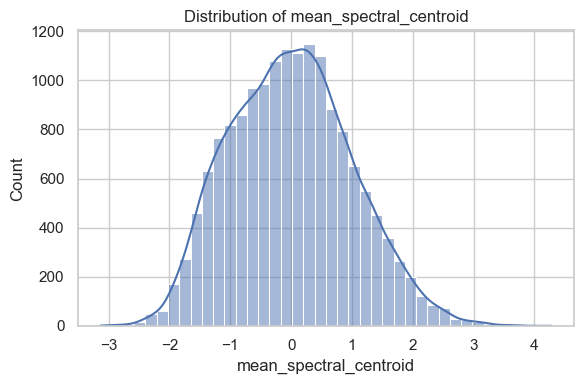

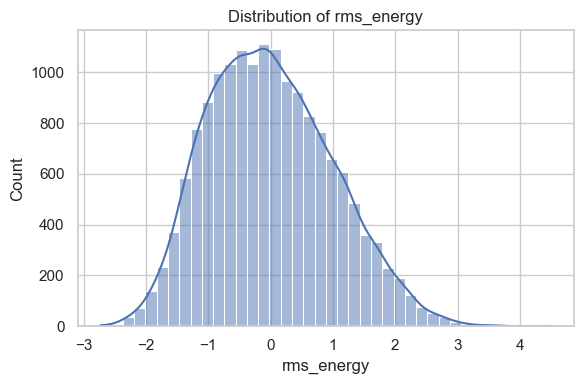

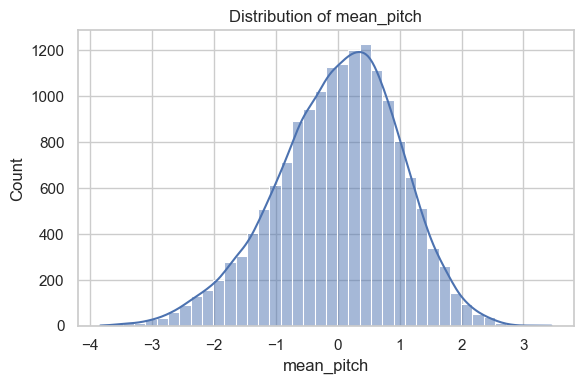

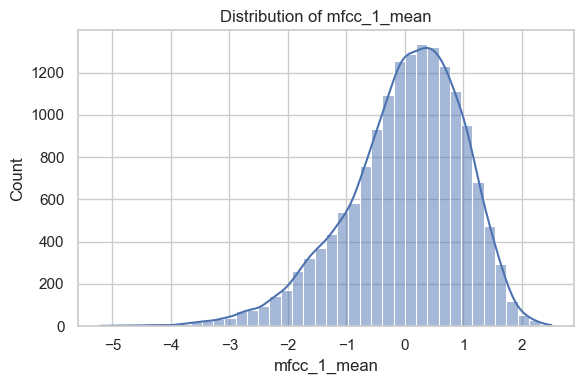

In [74]:
# 1. Visualize Feature Distributions
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Plot a few feature distributions
features_to_plot = ['mean_spectral_centroid', 'rms_energy', 'mean_pitch', 'mfcc_1_mean']

for feature in features_to_plot:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=X_scaled_df, x=feature, kde=True, bins=40)
    plt.title(f"Distribution of {feature}")
    plt.tight_layout()
    plt.show()

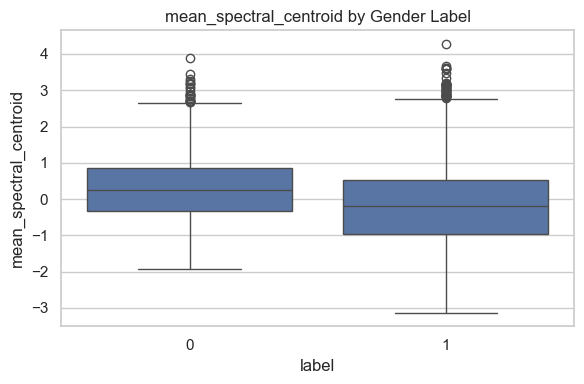

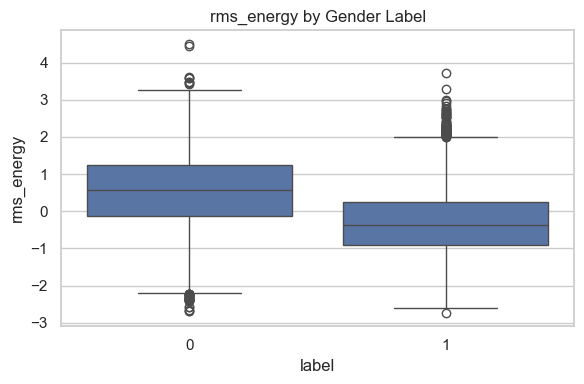

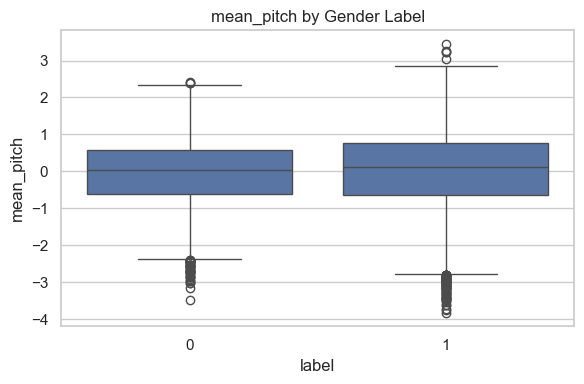

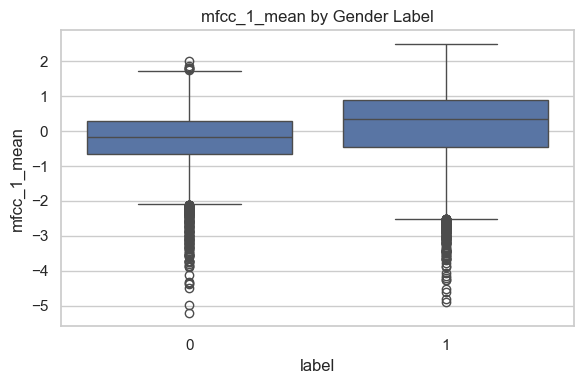

In [75]:
# 2. Boxplots by Class (Label) – Detect Class-wise Patterns
# Compare feature values across classes
for feature in features_to_plot:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=y, y=X_scaled_df[feature])
    plt.title(f"{feature} by Gender Label")
    plt.tight_layout()
    plt.show()

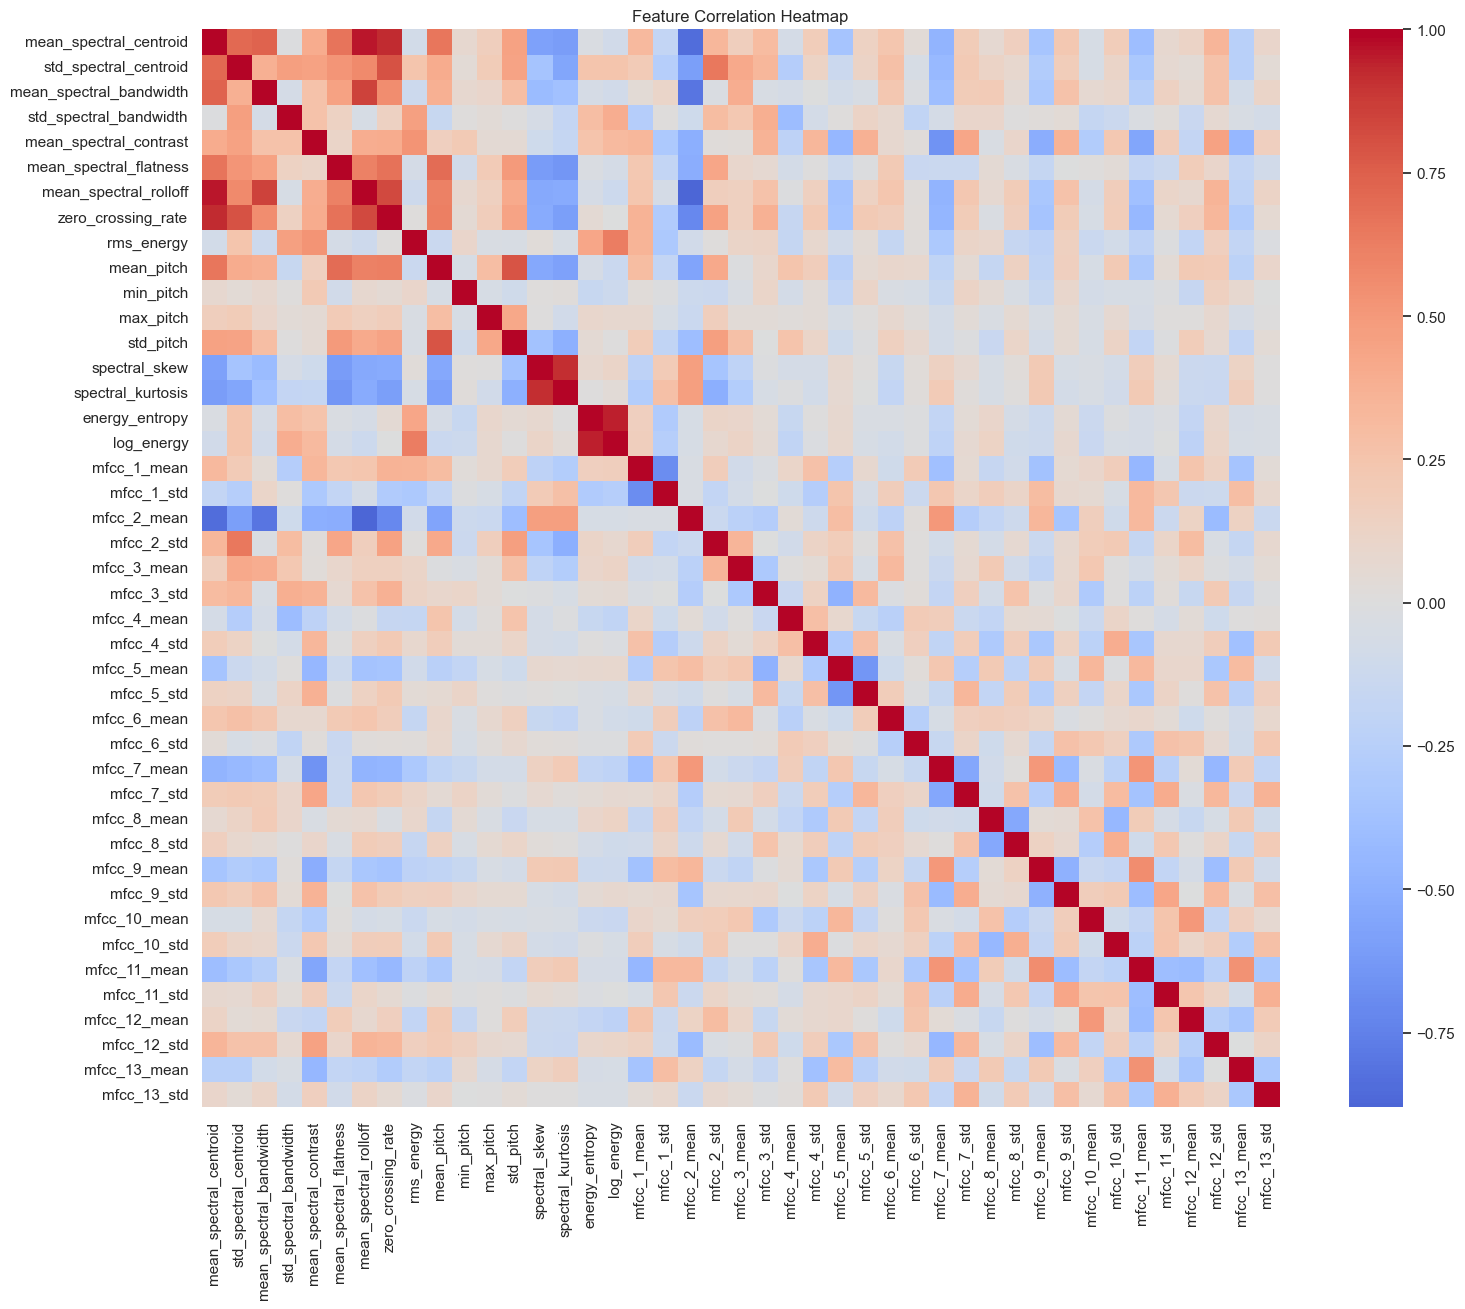

In [76]:
# 3. Correlation Heatmap (All Features)
import numpy as np

plt.figure(figsize=(18, 14))
corr = X_scaled_df.corr()
sns.heatmap(corr, cmap='coolwarm', center=0, square=True)
plt.title("Feature Correlation Heatmap")
plt.show()

In [77]:
# 4. Correlation with Target (Label)
from scipy.stats import pointbiserialr

target_corr = {}
for col in X_scaled_df.columns:
    r, _ = pointbiserialr(X_scaled_df[col], y)
    target_corr[col] = abs(r)  # Use absolute value

# Top 15 most relevant features by correlation with target
sorted_corr = sorted(target_corr.items(), key=lambda x: x[1], reverse=True)
top_15_features = [f[0] for f in sorted_corr[:15]]

print("Top 15 Features Most Correlated with Target:")
print(top_15_features)

Top 15 Features Most Correlated with Target:
['mean_spectral_contrast', 'mfcc_3_std', 'std_spectral_bandwidth', 'mfcc_2_mean', 'mfcc_10_mean', 'mfcc_12_mean', 'mfcc_5_mean', 'rms_energy', 'mfcc_4_mean', 'mfcc_12_std', 'std_spectral_centroid', 'mfcc_7_mean', 'log_energy', 'min_pitch', 'mfcc_2_std']


1. Are there significant differences in spectral centroid between the two genders?

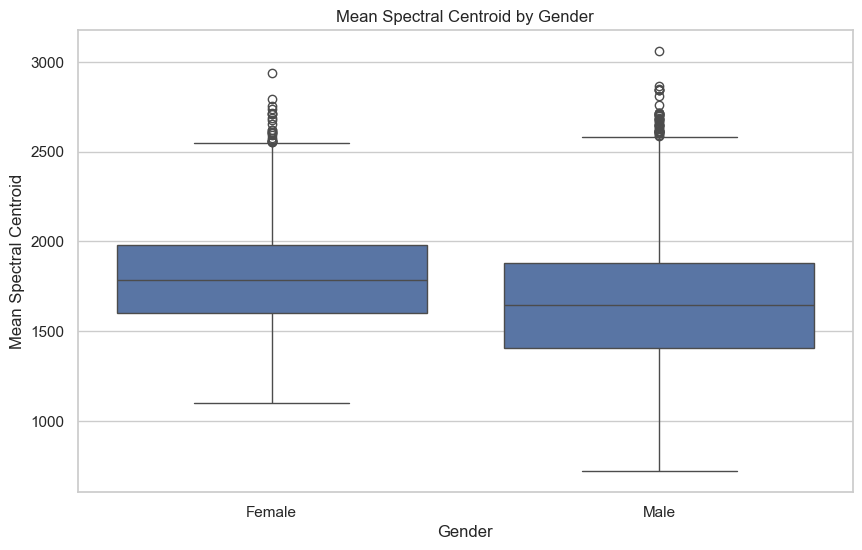

In [79]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
df['Gender'] = df['label'].map({0: 'Female', 1: 'Male'})
sns.boxplot(data=df, x='Gender', y='mean_spectral_centroid')
plt.title("Mean Spectral Centroid by Gender")
plt.xlabel("Gender")
plt.ylabel("Mean Spectral Centroid")
plt.show()

2. Is there a strong relationship between spectral bandwidth and pitch variability?

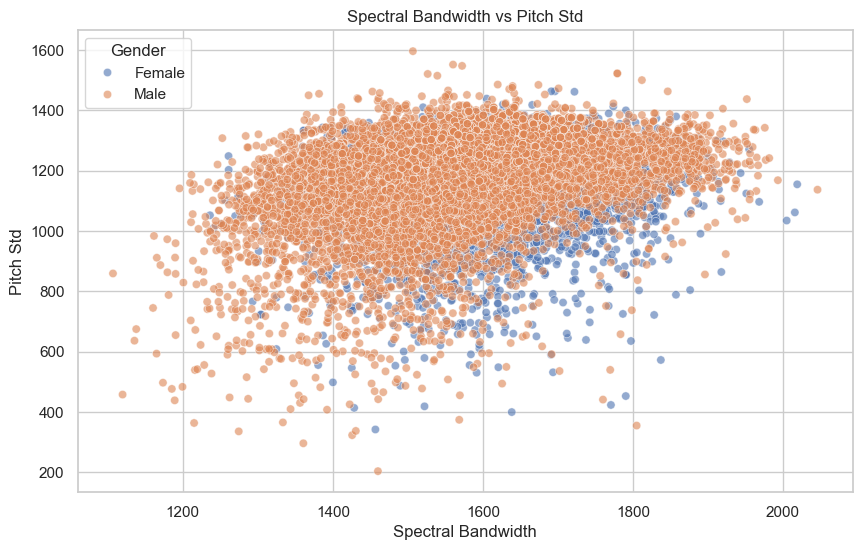

In [81]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='mean_spectral_bandwidth', y='std_pitch', hue='Gender', alpha=0.6)
plt.title("Spectral Bandwidth vs Pitch Std")
plt.xlabel("Spectral Bandwidth")
plt.ylabel("Pitch Std")
plt.show()

3. Do male and female voices differ in mean pitch?

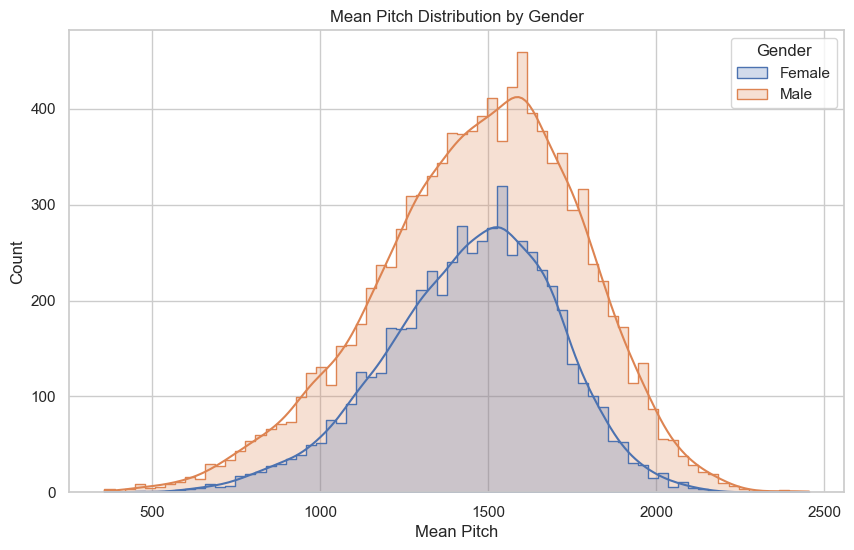

In [83]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='mean_pitch', hue='Gender', kde=True, element="step")
plt.title("Mean Pitch Distribution by Gender")
plt.xlabel("Mean Pitch")
plt.show()

4. Is spectral contrast higher in male or female voices?

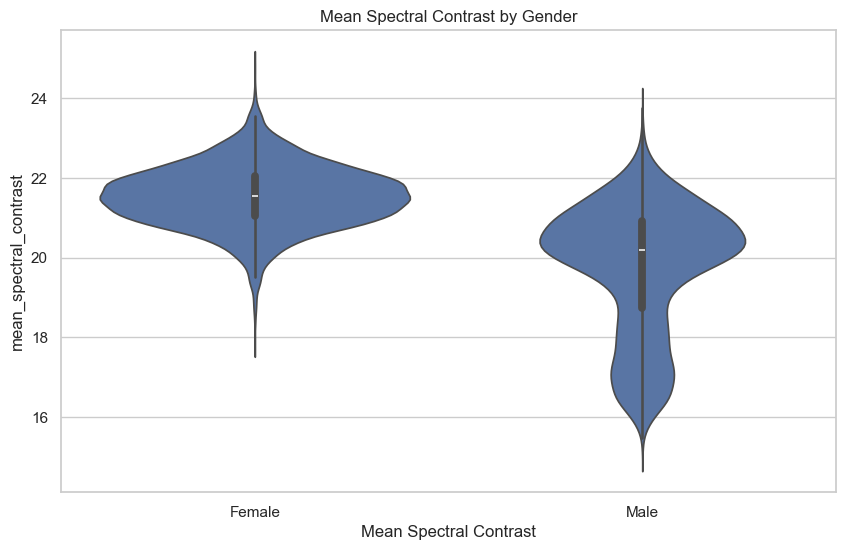

In [85]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Gender', y='mean_spectral_contrast')
plt.title("Mean Spectral Contrast by Gender")
plt.xlabel("Mean Spectral Contrast")
plt.show()

5. How does zero-crossing rate vary across genders?

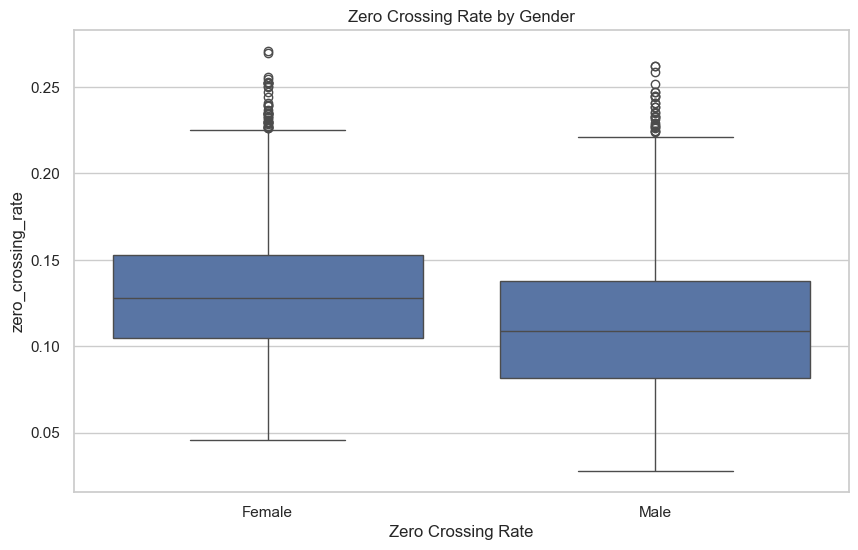

In [87]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Gender', y='zero_crossing_rate')
plt.title("Zero Crossing Rate by Gender")
plt.xlabel("Zero Crossing Rate")
plt.show()

6. Is pitch standard deviation (pitch variability) higher for one gender?

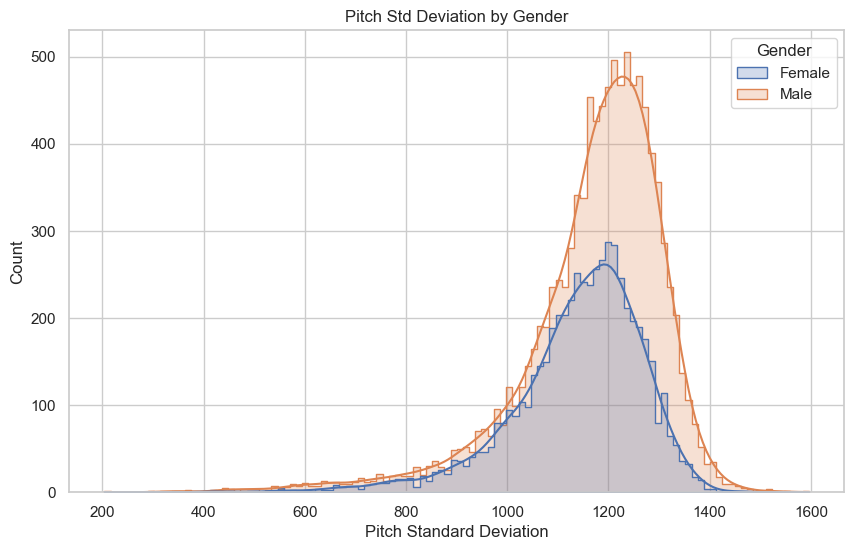

In [89]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='std_pitch', hue='Gender', kde=True, element="step")
plt.title("Pitch Std Deviation by Gender")
plt.xlabel("Pitch Standard Deviation")
plt.show()

7. What is the correlation between mean_pitch and spectral_rolloff?

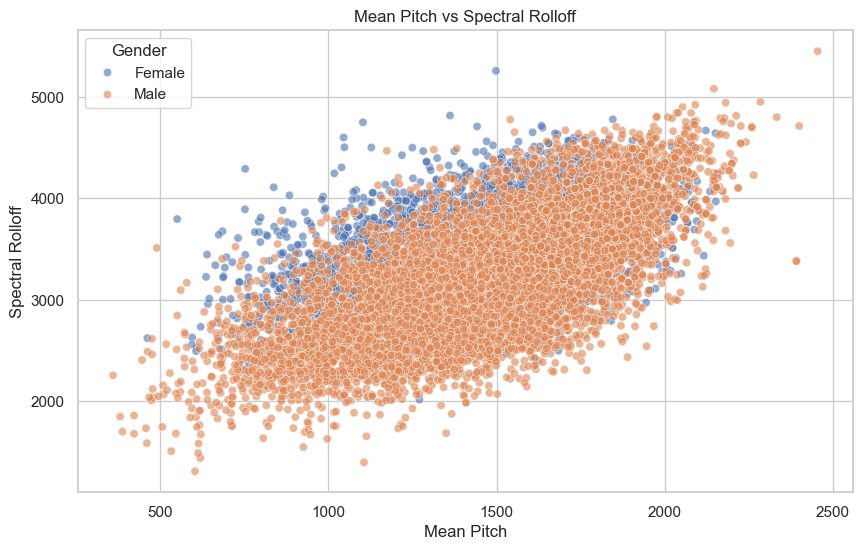

In [91]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='mean_pitch', y='mean_spectral_rolloff', hue='Gender', alpha=0.6)
plt.title("Mean Pitch vs Spectral Rolloff")
plt.xlabel("Mean Pitch")
plt.ylabel("Spectral Rolloff")
plt.show()

8. Does spectral skew or kurtosis reveal voice timbre differences?

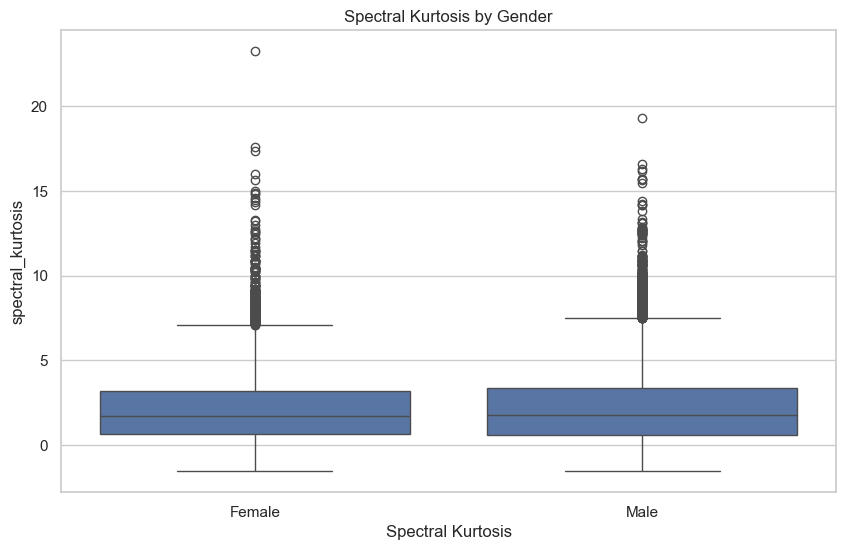

In [93]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Gender', y='spectral_kurtosis')
plt.title("Spectral Kurtosis by Gender")
plt.xlabel("Spectral Kurtosis")
plt.show()

9. Are there clusters of voices based on spectral_centroid and rms_energy?

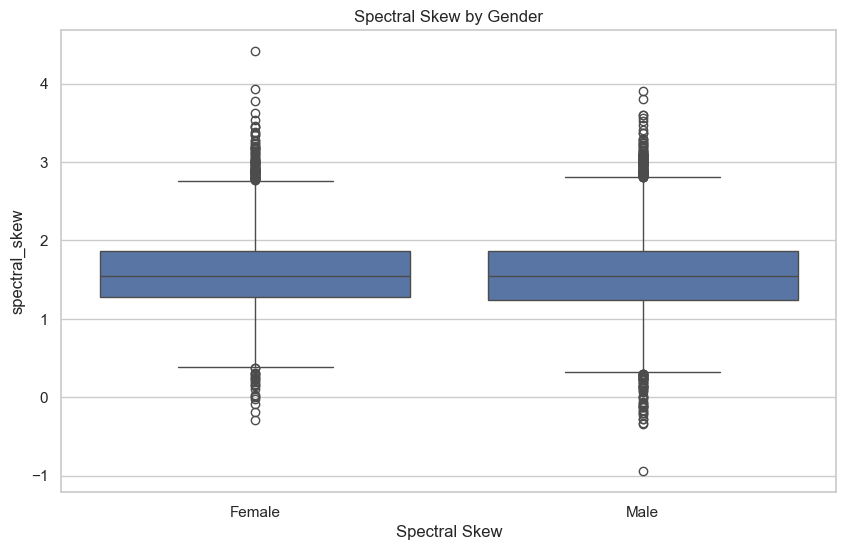

In [95]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Gender', y='spectral_skew')
plt.title("Spectral Skew by Gender")
plt.xlabel("Spectral Skew")
plt.show()

10. Is there redundancy among spectral features (e.g., centroid vs rolloff)?

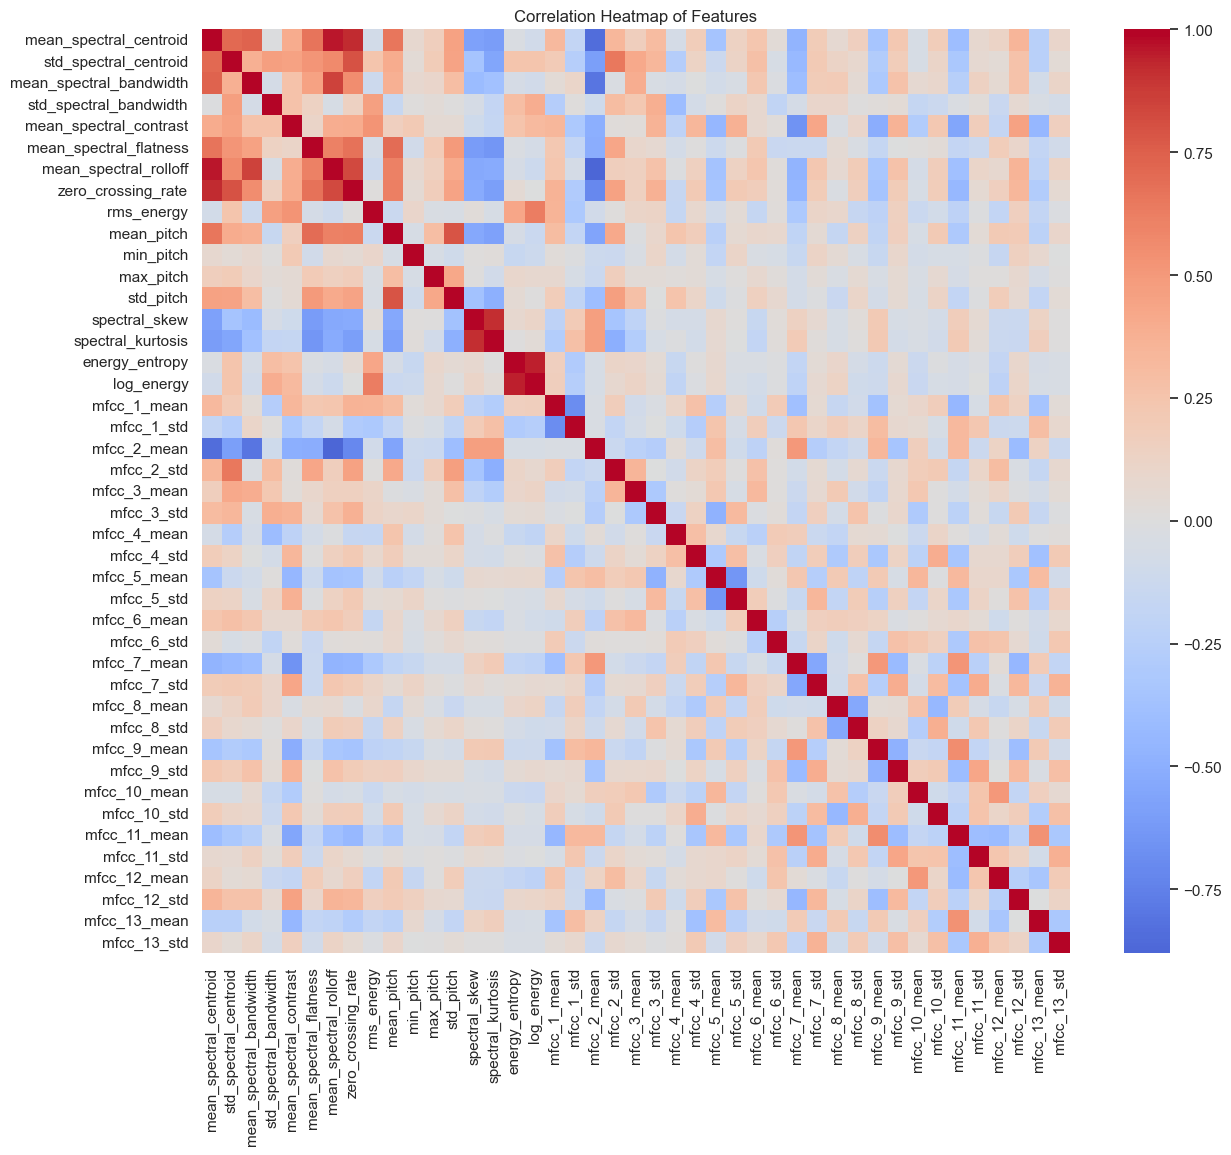

In [97]:
plt.figure(figsize=(14, 12))
corr = df.drop(columns=['label', 'Gender']).corr()
sns.heatmap(corr, cmap='coolwarm', annot=False, center=0)
plt.title("Correlation Heatmap of Features")
plt.show()

In [99]:
# PCA for 2D Clustering Visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

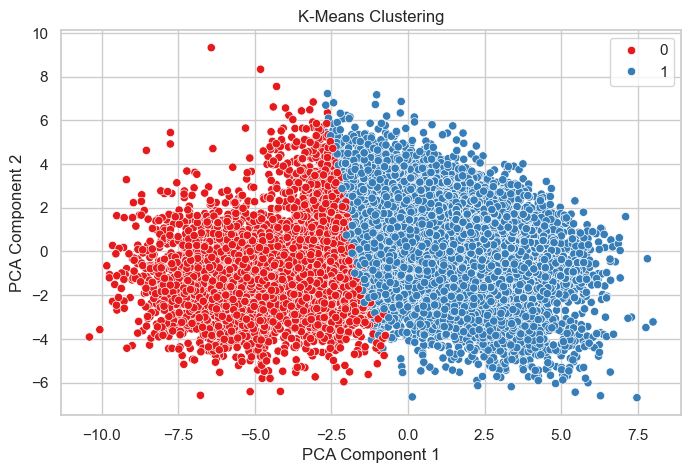

In [100]:
# K-Means Clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and fit KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Visualize clusters in 2D PCA space
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='Set1')
plt.title("K-Means Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

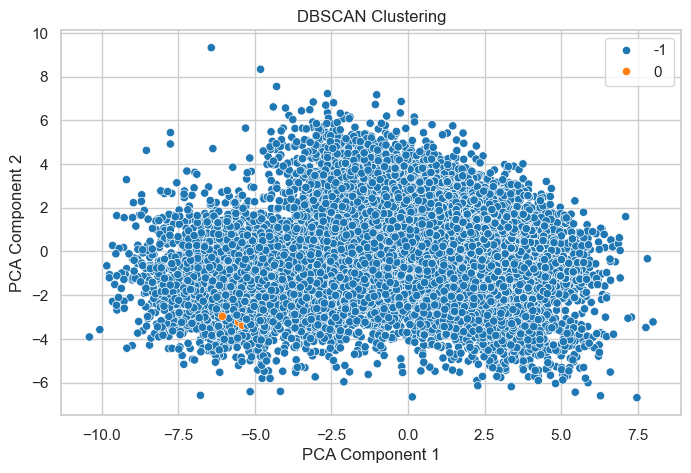

In [101]:
# DBSCAN Clustering
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=2.0, min_samples=5) 
dbscan_labels = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=dbscan_labels, palette='tab10')
plt.title("DBSCAN Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

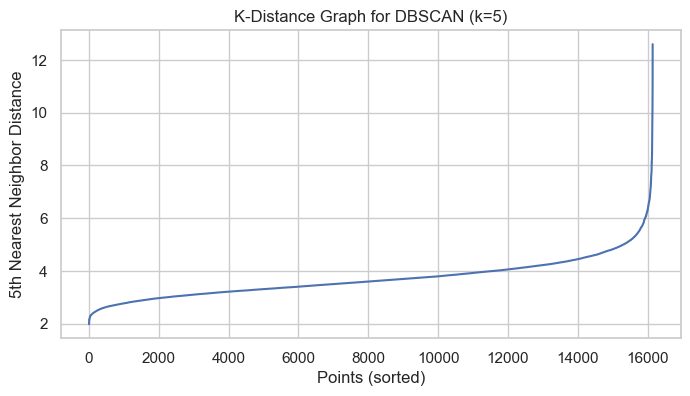

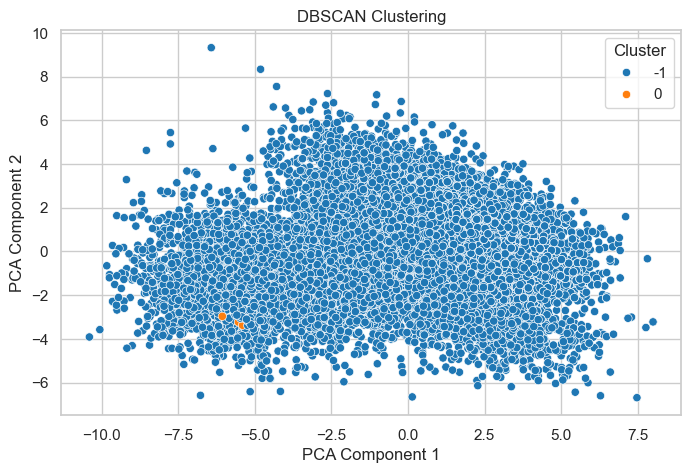

In [102]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# K-distance Graph (Elbow Method)
k = 5 
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Sort distances to k-th nearest neighbor
distances = np.sort(distances[:, k-1])  # 0-based index

# Plot the K-distance (elbow) graph
plt.figure(figsize=(8, 4))
plt.plot(distances)
plt.title("K-Distance Graph for DBSCAN (k=5)")
plt.xlabel("Points (sorted)")
plt.ylabel(f"{k}th Nearest Neighbor Distance")
plt.grid(True)
plt.show()

# Apply DBSCAN 
dbscan = DBSCAN(eps=2.0, min_samples=5)  # Tune `eps` based on elbow
dbscan_labels = dbscan.fit_predict(X_scaled)

# Visualization using PCA components
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=dbscan_labels, palette='tab10', legend='full')
plt.title("DBSCAN Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster')
plt.show()

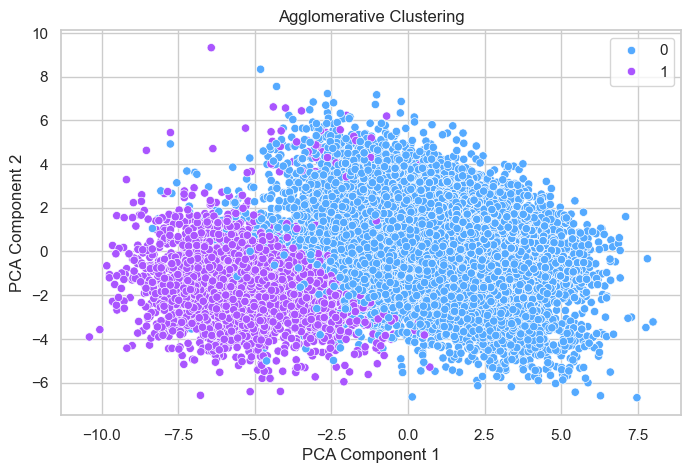

In [103]:
# Step 4: Hierarchical Clustering (Agglomerative)
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=2)  # Assuming 2 clusters
agglo_labels = agglo.fit_predict(X_scaled)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=agglo_labels, palette='cool')
plt.title("Agglomerative Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

In [105]:
# Evaluate K-Means, DBSCAN, and Agglomerative using silhouette_score
from sklearn.metrics import silhouette_score

# Calculate silhouette scores
kmeans_score = silhouette_score(X_scaled, kmeans_labels)
dbscan_score = silhouette_score(X_scaled, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1
agglo_score = silhouette_score(X_scaled, agglo_labels)

# Print results
print(f"Silhouette Score - KMeans: {kmeans_score:.3f}")
print(f"Silhouette Score - DBSCAN: {dbscan_score:.3f}")
print(f"Silhouette Score - Agglomerative: {agglo_score:.3f}")

Silhouette Score - KMeans: 0.176
Silhouette Score - DBSCAN: 0.014
Silhouette Score - Agglomerative: 0.187


In [107]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report
)
# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [108]:
# Features and target
X = df.drop(columns=['label', 'Gender'])  # Drop the label and mapped gender column
y = df['label']  # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


 Random Forest
Best Params: {'max_depth': None, 'n_estimators': 150}
Accuracy: 0.9954
Precision: 0.9947
Recall: 0.9981
F1 Score: 0.9964

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1163
           1       0.99      1.00      1.00      2067

    accuracy                           1.00      3230
   macro avg       1.00      0.99      0.99      3230
weighted avg       1.00      1.00      1.00      3230



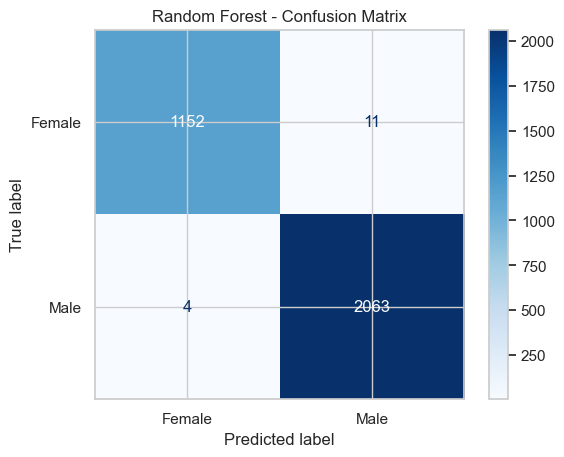


 SVM
Best Params: {'C': 1, 'kernel': 'rbf'}
Accuracy: 0.9997
Precision: 1.0000
Recall: 0.9995
F1 Score: 0.9998

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1163
           1       1.00      1.00      1.00      2067

    accuracy                           1.00      3230
   macro avg       1.00      1.00      1.00      3230
weighted avg       1.00      1.00      1.00      3230



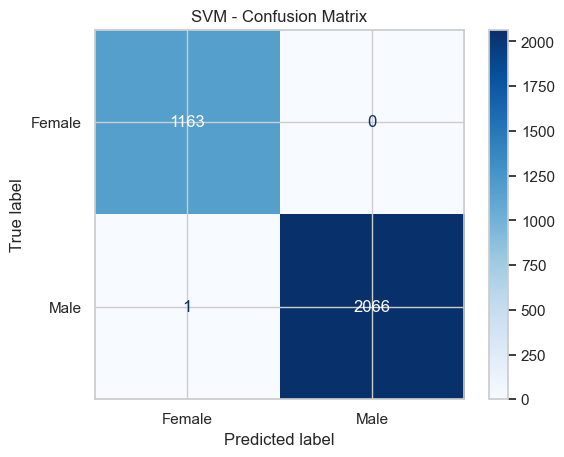


 Neural Network
Best Params: {'activation': 'relu', 'hidden_layer_sizes': (100,)}
Accuracy: 0.9997
Precision: 1.0000
Recall: 0.9995
F1 Score: 0.9998

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1163
           1       1.00      1.00      1.00      2067

    accuracy                           1.00      3230
   macro avg       1.00      1.00      1.00      3230
weighted avg       1.00      1.00      1.00      3230



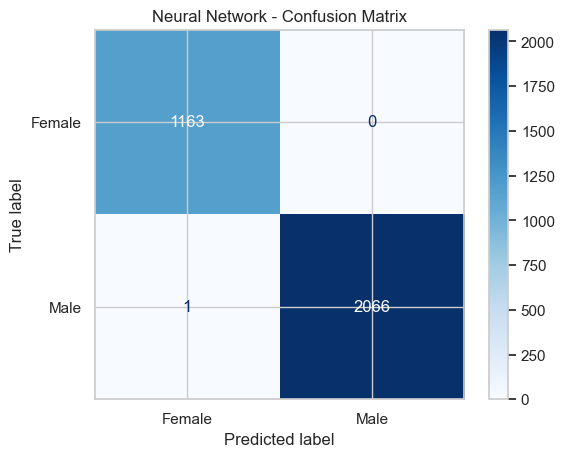


 Logistic Regression
Best Params: {'C': 10}
Accuracy: 0.9935
Precision: 0.9947
Recall: 0.9952
F1 Score: 0.9949

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1163
           1       0.99      1.00      0.99      2067

    accuracy                           0.99      3230
   macro avg       0.99      0.99      0.99      3230
weighted avg       0.99      0.99      0.99      3230



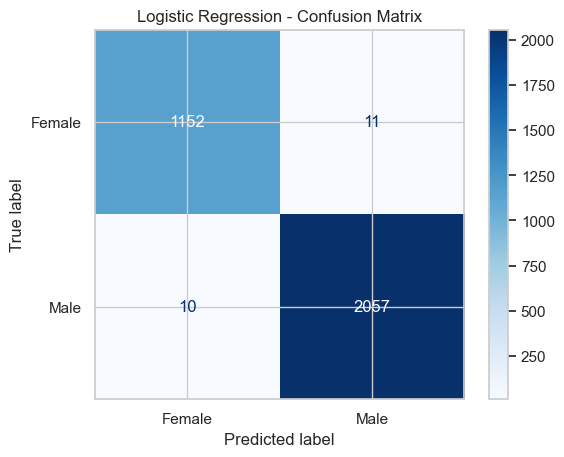


 Decision Tree
Best Params: {'max_depth': 10}
Accuracy: 0.9625
Precision: 0.9660
Recall: 0.9758
F1 Score: 0.9709

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      1163
           1       0.97      0.98      0.97      2067

    accuracy                           0.96      3230
   macro avg       0.96      0.96      0.96      3230
weighted avg       0.96      0.96      0.96      3230



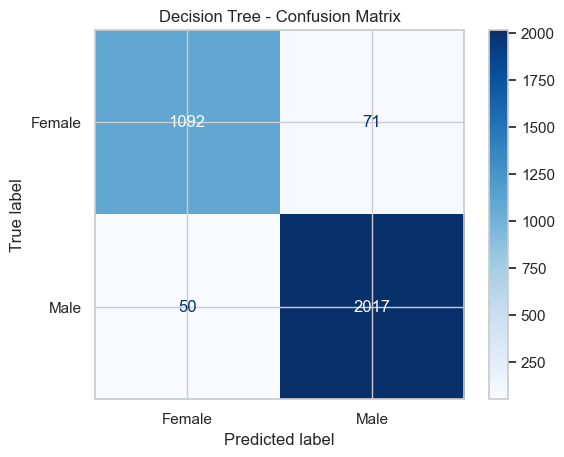

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)

# Feature and label
X = df.drop(columns=['label', 'Gender'])
y = df['label']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Store predictions and best models
results = {}
best_models = {}

# 1. Random Forest
rf_params = {'n_estimators': [100, 150], 'max_depth': [None, 10]}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=3, scoring='accuracy')
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_
y_pred_rf = rf_best.predict(X_test)
results['Random Forest'] = y_pred_rf
best_models['Random Forest'] = rf_best

# 2. SVM
svm_params = {'C': [1, 10], 'kernel': ['rbf', 'linear']}
svm_grid = GridSearchCV(SVC(probability=True), svm_params, cv=3, scoring='accuracy')
svm_grid.fit(X_train, y_train)
svm_best = svm_grid.best_estimator_
y_pred_svm = svm_best.predict(X_test)
results['SVM'] = y_pred_svm
best_models['SVM'] = svm_best

# 3. Neural Network (MLP)
mlp_params = {'hidden_layer_sizes': [(100,), (50, 50)], 'activation': ['relu', 'tanh']}
mlp_grid = GridSearchCV(MLPClassifier(max_iter=500), mlp_params, cv=3, scoring='accuracy')
mlp_grid.fit(X_train, y_train)
mlp_best = mlp_grid.best_estimator_
y_pred_mlp = mlp_best.predict(X_test)
results['Neural Network'] = y_pred_mlp
best_models['Neural Network'] = mlp_best

# 4. Logistic Regression
logreg_params = {'C': [0.1, 1, 10]}
logreg_grid = GridSearchCV(LogisticRegression(max_iter=1000), logreg_params, cv=3, scoring='accuracy')
logreg_grid.fit(X_train, y_train)
logreg_best = logreg_grid.best_estimator_
y_pred_logreg = logreg_best.predict(X_test)
results['Logistic Regression'] = y_pred_logreg
best_models['Logistic Regression'] = logreg_best

# 5. Decision Tree
dt_params = {'max_depth': [5, 10, None]}
dt_grid = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=3, scoring='accuracy')
dt_grid.fit(X_train, y_train)
dt_best = dt_grid.best_estimator_
y_pred_dt = dt_best.predict(X_test)
results['Decision Tree'] = y_pred_dt
best_models['Decision Tree'] = dt_best

# Evaluation
for model_name, y_pred in results.items():
    print(f"\n {model_name}")
    grid = {
        "Random Forest": rf_grid,
        "SVM": svm_grid,
        "Neural Network": mlp_grid,
        "Logistic Regression": logreg_grid,
        "Decision Tree": dt_grid
    }[model_name]

    print(f"Best Params: {grid.best_params_}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Female', 'Male'])
    disp.plot(cmap='Blues')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.show()

In [110]:
import pandas as pd

# Initialize list to store metric results
metrics_summary = []

# Calculate and collect metrics
for model_name, y_pred in results.items():
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    metrics_summary.append({
        'Model': model_name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1
    })

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics_summary)

# Sort by F1-score (or any other metric of choice)
metrics_df = metrics_df.sort_values(by='F1-Score', ascending=False)

# Display comparison table
print("\nModel Comparison Summary:")
print(metrics_df.reset_index(drop=True))


Model Comparison Summary:
                 Model  Accuracy  Precision    Recall  F1-Score
0                  SVM  0.999690   1.000000  0.999516  0.999758
1       Neural Network  0.999690   1.000000  0.999516  0.999758
2        Random Forest  0.995356   0.994696  0.998065  0.996378
3  Logistic Regression  0.993498   0.994681  0.995162  0.994921
4        Decision Tree  0.962539   0.965996  0.975810  0.970878


In [151]:
best_model_name = metrics_df.iloc[0]['Model']
print(f"\n Best-performing model based on F1-score: {best_model_name}")


 Best-performing model based on F1-score: SVM


In [153]:
%%writefile voice_gender_app.py
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score

df = pd.read_csv("vocal_gender_features_new.csv")

X_full = df.drop(columns=["label"])
y = df["label"]

# Train-test split
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_full, y, test_size=0.2, random_state=42, stratify=y
)

scaler_full = StandardScaler()
X_scaled_full = scaler_full.fit_transform(X_full)

svm_model = SVC(probability=True, C=10, kernel='rbf', random_state=42)
svm_model.fit(X_scaled_full, y)
best_models = {"SVM": svm_model}

st.set_page_config(page_title="Human Voice Classification and Clustering", layout="wide")
st.sidebar.title("Pages")
page = st.sidebar.radio("Go to", ["Introduction", "EDA", "Prediction", "Best Classification", "Best Clustering"])

# Introduction
if page == "Introduction":
    st.title("Human Voice Classification and Clustering")
    st.markdown("""
    ## About the Project
    
    Human voice carries rich information not only about speech content but also about the speaker’s identity, gender, age, and emotion. 
    This project explores voice-based gender classification and clustering using machine learning techniques.

    We use audio signal features — such as **spectral centroid**, **zero-crossing rate**, **MFCCs**, and **pitch-related descriptors** — 
    to build models that can:
    
    - Automatically **classify voice samples by gender**
    - **Cluster similar voices** based on their acoustic features

    This approach has real-world applications in:
    - Voice assistants and smart devices
    - Speaker profiling and security systems
    - Personalized media and accessibility tools

    The dataset consists of pre-extracted numerical features from voice recordings labeled by gender. 
    Machine learning models like Random Forest, SVM, and Neural Networks are used for classification, while clustering is done via KMeans, DBSCAN, and Hierarchical methods.
    """)

# EDA
elif page == "EDA":
    st.header("Exploratory Data Analysis (EDA)")
    st.markdown("Analysis of acoustic voice features grouped by gender")

    eda_questions = {
        "1. Are there significant differences in spectral centroid between the two genders?": 
            lambda ax: sns.boxplot(data=df, x='label', y='mean_spectral_centroid', ax=ax),

        "2. Is there a strong relationship between spectral bandwidth and pitch variability?": 
            lambda ax: sns.scatterplot(data=df, x='mean_spectral_bandwidth', y='std_pitch', hue='label', ax=ax),

        "3. Do male and female voices differ in mean pitch?": 
            lambda ax: sns.histplot(data=df, x='mean_pitch', hue='label', kde=True, ax=ax),

        "4. Is spectral contrast higher in male or female voices?": 
            lambda ax: sns.violinplot(data=df, x='label', y='mean_spectral_contrast', ax=ax),

        "5. How does zero-crossing rate vary across genders?": 
            lambda ax: sns.boxplot(data=df, x='label', y='zero_crossing_rate', ax=ax),

        "6. Is pitch standard deviation (pitch variability) higher for one gender?": 
            lambda ax: sns.histplot(data=df, x='std_pitch', hue='label', kde=True, ax=ax),

        "7. What is the correlation between mean_pitch and spectral_rolloff?": 
            lambda ax: sns.scatterplot(data=df, x='mean_pitch', y='mean_spectral_rolloff', hue='label', ax=ax),

        "8. Does spectral skew or kurtosis reveal voice timbre differences?": 
            "multi_plot", 

        "9. Are there clusters of voices based on spectral_centroid and rms_energy?": 
            lambda ax: sns.scatterplot(data=df, x='mean_spectral_centroid', y='rms_energy', hue='label', ax=ax),

        "10. Is there redundancy among spectral features (e.g., centroid vs rolloff)?": 
            lambda ax: sns.heatmap(df.corr(), annot=False, cmap='coolwarm', ax=ax)
    }

    selected_q = st.selectbox("Select EDA Question", list(eda_questions.keys()))
    st.subheader(selected_q)

    if eda_questions[selected_q] == "multi_plot":
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        sns.boxplot(data=df, x='label', y='spectral_kurtosis', ax=axes[0])
        axes[0].set_title("Spectral Kurtosis by Gender")
        sns.boxplot(data=df, x='label', y='spectral_skew', ax=axes[1])
        axes[1].set_title("Spectral Skew by Gender")
        st.pyplot(fig)
    else:
        fig, ax = plt.subplots(figsize=(8, 5))
        plot_func = eda_questions[selected_q]
        plot_func(ax)
        st.pyplot(fig)

# Prediction
elif page == "Prediction":
    st.header("Prediction Using Top 15 Features")

    # Feature selection applied here only
    selector = SelectKBest(score_func=f_classif, k=15)
    X_selected = selector.fit_transform(X_full, y)
    selected_features = X_full.columns[selector.get_support()].tolist()

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_selected)

    svm = SVC(probability=True, C=10, kernel='rbf', random_state=42)
    svm.fit(X_scaled, y)
    best_models["SVM"] = svm

    input_data = []
    st.markdown("### Input Feature Values")
    for feature in selected_features:
        min_val = float(df[feature].min())
        max_val = float(df[feature].max())
        mean_val = float(df[feature].mean())
        val = st.slider(
            f"{feature}",
            min_value=min_val,
            max_value=max_val,
            value=mean_val,
            step=(max_val - min_val) / 100,
        )
        input_data.append(val)

    if st.button("Predict Gender"):
        input_array = np.array(input_data).reshape(1, -1)
        input_scaled = scaler.transform(input_array)
        pred = svm.predict(input_scaled)
        proba = svm.predict_proba(input_scaled)[0]

        predicted_gender = "Male" if pred[0] == 1 else "Female"
        st.success(f"Predicted Gender: {predicted_gender}")
        st.info(f"Confidence: Male: {proba[1]*100:.2f}%, Female: {proba[0]*100:.2f}%")

        st.subheader("Where does this voice lie in the cluster space?")
        agg = AgglomerativeClustering(n_clusters=2)
        cluster_labels = agg.fit_predict(X_scaled)
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X_scaled)
        input_pca = pca.transform(input_scaled)

        fig, ax = plt.subplots(figsize=(10, 6))
        scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap="viridis", s=40, alpha=0.6, label="Dataset")
        ax.scatter(input_pca[0, 0], input_pca[0, 1], color="red", s=100, marker="X", label="Your Voice")
        ax.legend()
        ax.set_title("Cluster Position of Your Input Voice (PCA Reduced)")
        st.pyplot(fig)

# Best Classification
elif page == "Best Classification":
    st.header("Best Classification Model: SVM")

    y_pred = best_models["SVM"].predict(X_scaled_full)

    acc = accuracy_score(y, y_pred)
    prec = precision_score(y, y_pred)
    rec = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)

    st.write("### Metrics:")
    st.write(f"Accuracy: {acc:.4f}")
    st.write(f"Precision: {prec:.4f}")
    st.write(f"Recall: {rec:.4f}")
    st.write(f"F1 Score: {f1:.4f}")

    cm = confusion_matrix(y, y_pred)
    fig, ax = plt.subplots()
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Female", "Male"])
    disp.plot(ax=ax, cmap='Blues')
    st.pyplot(fig)

# Best Clustering
elif page == "Best Clustering":
    st.header("Best Clustering Model: Agglomerative Clustering")

    agg_model = AgglomerativeClustering(n_clusters=2)
    cluster_labels = agg_model.fit_predict(X_scaled_full)

    silhouette = silhouette_score(X_scaled_full, cluster_labels)

    st.write(f"### Silhouette Score: {silhouette:.3f}")

    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled_full)

    fig, ax = plt.subplots()
    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=15)
    legend_labels = [f"Cluster {i}" for i in np.unique(cluster_labels)]
    legend = ax.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title="Clusters")
    ax.set_title("Agglomerative Clustering (PCA Projection)")
    st.pyplot(fig)

Overwriting voice_gender_app.py


In [149]:
!streamlit run voice_gender_app.py

^C
